In [227]:
import numpy as np
import random
file=open(r'adaboost_dataset.txt')
docs=file.read()
docs=docs.split('\n')
ds=[]
for i in docs:
  tt=[]
  temp=i.split(',')
  #ds.append(i.split(','))
  for j in temp:
    try:
      tt.append(eval(j))
    except:
      if(j=='brown'):
        tt.append(0)
      if(j=='black'):
        tt.append(1)
      if(j=='F'):
        tt.append(0)
      if(j=='M'):
        tt.append(1)
  ds.append(tt)
ds=np.array(ds)
ds=ds[:,1:ds.shape[1]+1]

In [228]:
ds

array([[ 5.5, 72. ,  0. ,  0. ],
       [ 5.7, 75. ,  1. ,  1. ],
       [ 5.4, 70. ,  0. ,  1. ],
       [ 5. , 60. ,  1. ,  0. ],
       [ 5.8, 70. ,  0. ,  0. ],
       [ 6. , 71. ,  1. ,  1. ],
       [ 5.9, 76. ,  1. ,  1. ],
       [ 6.1, 70. ,  0. ,  1. ],
       [ 5.6, 70. ,  0. ,  0. ],
       [ 6.2, 75. ,  1. ,  1. ]])

In [229]:
N=ds.shape[0]
ini_w=1/N
ds=np.append(ds,np.array([ini_w]*N).reshape(N,1),1)

In [230]:
ds

array([[ 5.5, 72. ,  0. ,  0. ,  0.1],
       [ 5.7, 75. ,  1. ,  1. ,  0.1],
       [ 5.4, 70. ,  0. ,  1. ,  0.1],
       [ 5. , 60. ,  1. ,  0. ,  0.1],
       [ 5.8, 70. ,  0. ,  0. ,  0.1],
       [ 6. , 71. ,  1. ,  1. ,  0.1],
       [ 5.9, 76. ,  1. ,  1. ,  0.1],
       [ 6.1, 70. ,  0. ,  1. ,  0.1],
       [ 5.6, 70. ,  0. ,  0. ,  0.1],
       [ 6.2, 75. ,  1. ,  1. ,  0.1]])

In [231]:
 from sklearn.tree import DecisionTreeClassifier
 dt=DecisionTreeClassifier(max_depth=1)

In [234]:
X=ds[:,0:3]
y=ds[:,3]
dt.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 5.85\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

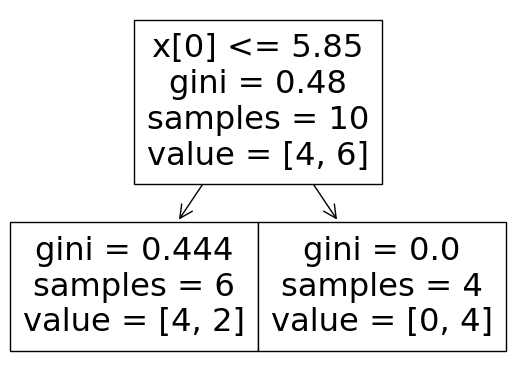

In [235]:
from sklearn.tree import plot_tree
plot_tree(dt)

In [236]:
y_pred=dt.predict(X)
ds=np.append(ds,y_pred.reshape(N,1),1)

In [237]:
ds

array([[ 5.5, 72. ,  0. ,  0. ,  0.1,  0. ],
       [ 5.7, 75. ,  1. ,  1. ,  0.1,  0. ],
       [ 5.4, 70. ,  0. ,  1. ,  0.1,  0. ],
       [ 5. , 60. ,  1. ,  0. ,  0.1,  0. ],
       [ 5.8, 70. ,  0. ,  0. ,  0.1,  0. ],
       [ 6. , 71. ,  1. ,  1. ,  0.1,  1. ],
       [ 5.9, 76. ,  1. ,  1. ,  0.1,  1. ],
       [ 6.1, 70. ,  0. ,  1. ,  0.1,  1. ],
       [ 5.6, 70. ,  0. ,  0. ,  0.1,  0. ],
       [ 6.2, 75. ,  1. ,  1. ,  0.1,  1. ]])

In [238]:
#error calc
temp=ds[:,3]!=ds[:,5]
error=0
for i in range(len(temp)):
  if temp[i]:
    error+=ds[i,4]

error

0.2

In [239]:
def calculate_model_weight(error):
  return np.log((1-error)/error)

In [240]:
#update weight
alpha1=calculate_model_weight(error)

temp=ds[:,3]!=ds[:,5]
for i in range(len(temp)):
  if temp[i]:
    ds[i,4]=ds[i,4]*np.exp(-alpha1)


In [241]:
#normalize weight
sum=np.sum(ds[:,4])
ds[:,4]=ds[:,4]/sum

In [242]:
ds


array([[5.50000000e+00, 7.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.17647059e-01, 0.00000000e+00],
       [5.70000000e+00, 7.50000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.94117647e-02, 0.00000000e+00],
       [5.40000000e+00, 7.00000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.94117647e-02, 0.00000000e+00],
       [5.00000000e+00, 6.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.17647059e-01, 0.00000000e+00],
       [5.80000000e+00, 7.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.17647059e-01, 0.00000000e+00],
       [6.00000000e+00, 7.10000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.17647059e-01, 1.00000000e+00],
       [5.90000000e+00, 7.60000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.17647059e-01, 1.00000000e+00],
       [6.10000000e+00, 7.00000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.17647059e-01, 1.00000000e+00],
       [5.60000000e+00, 7.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.17647059e-01, 

In [263]:
#for randomly choosing based on weight
random.seed(1)
ds_new=np.array(random.choices(ds[:,0:4], weights=ds[:,4], k=N))

In [264]:
ds_new

array([[ 5.7, 75. ,  1. ,  1. ],
       [ 5.6, 70. ,  0. ,  0. ],
       [ 6.1, 70. ,  0. ,  1. ],
       [ 5. , 60. ,  1. ,  0. ],
       [ 6. , 71. ,  1. ,  1. ],
       [ 6. , 71. ,  1. ,  1. ],
       [ 6.1, 70. ,  0. ,  1. ],
       [ 5.6, 70. ,  0. ,  0. ],
       [ 5.5, 72. ,  0. ,  0. ],
       [ 5.5, 72. ,  0. ,  0. ]])